In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    # more on this later

In [76]:
import os
print(os.listdir("../input"))

['ex2data2.txt', 'ex1data2.txt', 'ex1data1.txt', 'ex2data1.txt']


In [77]:
data = pd.read_csv('../input/ex2data1.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


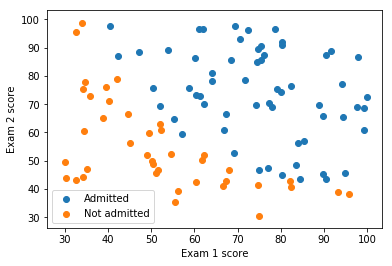

In [78]:
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [79]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [80]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [81]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [82]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros

J = costFunction(theta, X, y)
print(J)

0.6931471805599453


In [83]:
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))

In [84]:
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print(J)

0.20349770158947486


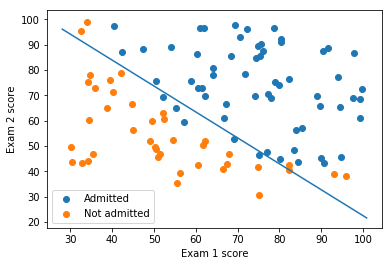

In [85]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  

mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [86]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)

accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0
